In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn

from sklearn.datasets import load_iris # importing dataset from sklearn default datasets
from sklearn.naive_bayes import GaussianNB # importing gaussian Naive Bayes Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
iris_dataset = load_iris()
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names) #only for direct dataset from sklearn
df['species'] = iris_dataset.target
df['species'] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isnull() # isnull checks null values row wise.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [5]:
df.isnull().any() # this one used to check null value.

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
species              False
dtype: bool

In [6]:
df. describe() # Get statistical summary.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


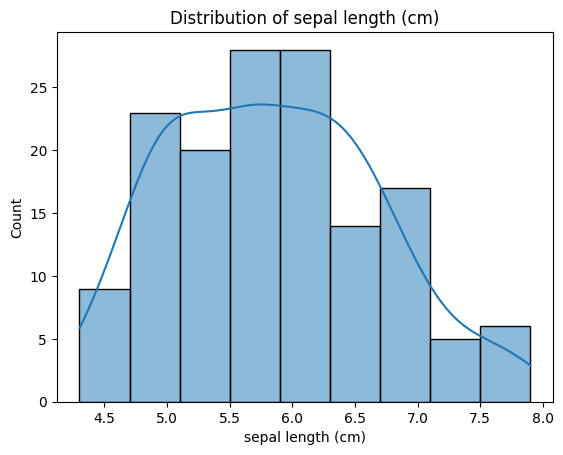

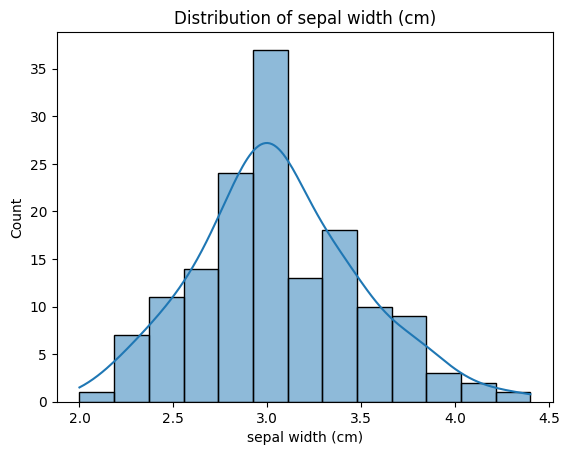

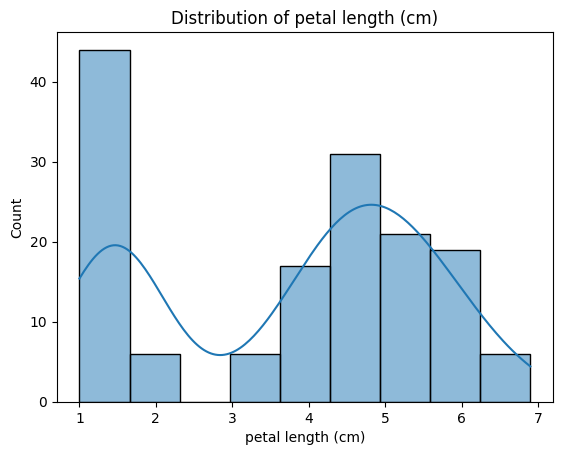

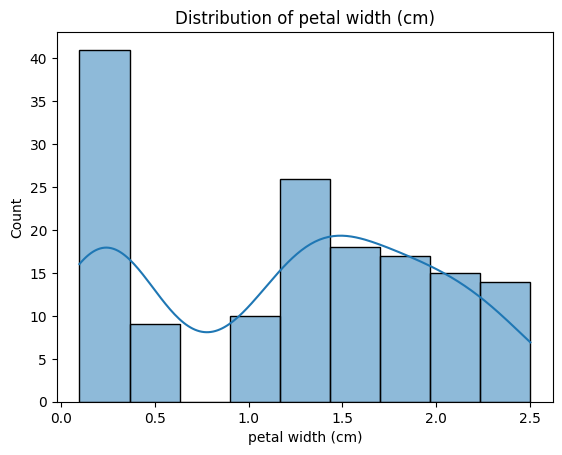

In [7]:
for column in df.columns[:-1]:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


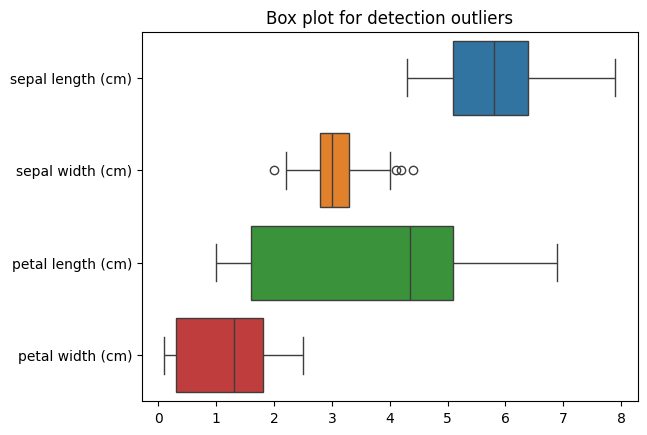

In [8]:
sns.boxplot(data=df, orient='h')
plt.title("Box plot for detection outliers")
plt.show()

In [9]:
column = 'sepal width (cm)'

#calculate Q1, Q3, IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3-Q1

#Define the bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Text(0.5, 1.0, 'Removed Outlairs')

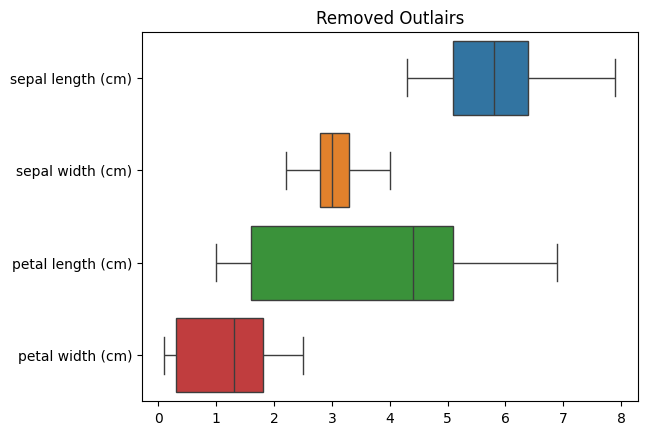

In [11]:
sns.boxplot(data=df, orient='h')
plt.title("Removed Outlairs")

In [14]:
# Train data and test data split
feature_columns = iris_dataset.feature_names # This list contains the names of the feature columns
x_train, x_test, y_train, y_test = train_test_split(df[feature_columns], df['species'], test_size=0.2)

In [15]:
#perform scaling
# fit training data with scaler.fit(training data) with StandardScaler() instance
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
x_train_scaled

array([[-1.09331648, -1.61876645, -0.25207741, -0.25244978],
       [ 0.95613228, -0.04521694,  0.38234227,  0.28242098],
       [-0.73164905, -0.8319917 ,  0.09396969,  0.28242098],
       [-1.21387229, -0.04521694, -1.34789323, -1.18847361],
       [-1.3344281 ,  0.47929956, -1.40556775, -1.3221913 ],
       [ 0.35335323, -0.56973344,  0.55536582,  0.0149856 ],
       [-0.85220486,  1.26607432, -1.34789323, -1.3221913 ],
       [ 0.83557647,  0.47929956,  0.78606389,  1.08472713],
       [-0.85220486,  1.00381607, -1.29021871, -1.3221913 ],
       [-1.09331648, -1.3565082 ,  0.44001679,  0.68357405],
       [-1.21387229,  1.00381607, -1.2325442 , -1.3221913 ],
       [ 2.5233578 ,  2.05284908,  1.5358326 ,  1.08472713],
       [-0.49053743,  2.31510733, -1.17486968, -1.05475592],
       [ 0.71502066, -0.56973344,  1.07443647,  1.35216251],
       [-0.49053743,  1.00381607, -1.29021871, -1.05475592],
       [-0.49053743, -0.04521694,  0.44001679,  0.41613867],
       [ 0.11224162, -0.

In [17]:
# train mode here
model = GaussianNB()
model.fit(x_train_scaled, y_train)

GaussianNB()

In [18]:
y_pred = model.predict(x_test_scaled) # make predictions on the test data 'x_test_scaled'.

In [19]:
y_pred

array(['versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica'], dtype='<U10')

In [20]:
y_test

96     versicolor
126     virginica
143     virginica
113     virginica
133     virginica
78     versicolor
19         setosa
112     virginica
139     virginica
107     virginica
76     versicolor
48         setosa
37         setosa
135     virginica
8          setosa
46         setosa
144     virginica
136     virginica
23         setosa
14         setosa
87     versicolor
83     versicolor
69     versicolor
43         setosa
10         setosa
51     versicolor
101     virginica
63     versicolor
103     virginica
117     virginica
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is {accuracy}')

Accuracy of the model is 0.9666666666666667


In [22]:
# confusion matrix evaluation
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]


In [23]:
# Classification report
print('Classification Report: \n', classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [25]:
cm_df = pd.DataFrame(cm, index=iris_dataset.target_names, columns=iris_dataset.target_names)
print('Confusion Matrix:')
print(cm_df)

Confusion Matrix:
            setosa  versicolor  virginica
setosa           9           0          0
versicolor       0           8          0
virginica        0           1         12


Text(0.5, 1.0, 'Confusion matrix')

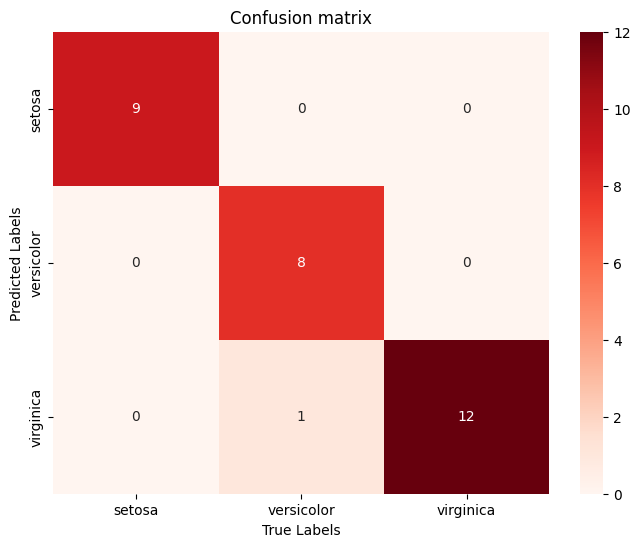

In [31]:
# Visualize using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Reds')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion matrix')